In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)

if not dir1 in sys.path:
    sys.path.append(dir1)

os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
import warnings
from tqdm.notebook import tqdm
import yaml
import datetime
import calendar

from src.data.preprocessing import read_data, data_to_np_tensor, preprocess_split
from models.t2v import *
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
warnings.simplefilter("ignore")

In [3]:
X_emb = pd.read_csv('data//TS2Vec//x_emb.csv')
y_emb = pd.read_csv('data//TS2Vec//y.csv')

In [4]:
X_emb.head()

,Datetime,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,Stock
0,2023-10-02 17:00:00,-0.576592,-0.085389,-0.180236,0.104353,0.052601,-0.373977,-0.303355,-0.245368,-0.153448,...,-0.237753,-0.183204,0.041506,-0.088383,-0.095953,-0.277801,-0.228087,0.075494,0.053723,AAPL
1,2023-10-02 18:00:00,0.005394,-0.263543,-0.445396,0.011726,-0.040396,-0.344073,0.058727,-0.339872,-0.423581,...,-0.169546,-0.176366,0.095663,-0.268582,-0.188872,0.106189,-0.060161,-0.139006,-0.091891,AAPL
2,2023-10-02 19:00:00,-0.624870,-0.094695,-0.210419,-0.111449,0.044308,-0.293072,-0.365148,-0.068545,0.067939,...,-0.199024,-0.110070,0.001707,-0.149053,-0.167050,-0.546129,-0.219797,0.113228,0.051339,AAPL
3,2023-10-02 20:00:00,-0.269701,-0.319665,-0.387342,-0.009177,-0.045935,-0.417750,-0.300339,-0.147413,-0.284537,...,-0.303175,-0.063661,0.060790,-0.392800,-0.258754,-0.076986,-0.120545,-0.191235,-0.055262,AAPL
4,2023-10-02 21:00:00,-0.389854,-0.064718,-0.247088,-0.022711,0.074581,-0.309505,-0.114075,-0.362405,-0.253921,...,-0.099198,-0.211249,0.083274,-0.046078,-0.063429,-0.216250,-0.152970,0.059913,0.014242,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,2023-11-06 18:00:00,-0.101061,-0.246383,-0.283701,-0.056795,-0.080366,-0.416125,-0.237057,-0.317585,-0.415544,...,-0.302791,-0.094210,0.101782,-0.341959,-0.164857,0.130709,-0.023948,-0.305364,-0.128359,XOM
4364,2023-11-06 19:00:00,-0.533081,-0.199663,-0.234824,-0.055469,0.038761,-0.261389,-0.313722,-0.175407,-0.113102,...,-0.186219,-0.141168,0.180547,-0.183145,-0.136388,-0.430996,-0.118240,0.102733,0.026605,XOM
4365,2023-11-06 20:00:00,-0.312044,-0.253871,-0.244659,-0.101523,-0.075817,-0.350221,-0.336873,-0.153063,-0.226129,...,-0.331553,-0.095176,0.160122,-0.355692,-0.196815,-0.146728,-0.117411,-0.203494,-0.086147,XOM
4366,2023-11-06 21:00:00,-0.313658,-0.076054,-0.275764,-0.039703,0.045781,-0.277464,-0.112843,-0.293361,-0.270590,...,-0.081913,-0.200701,0.130599,-0.084754,-0.127761,-0.204759,-0.100080,0.023182,0.004685,XOM


In [46]:
X_train = X_emb.loc[0:3695, :]
X_test = X_emb.loc[3696:, :]
y_train = y_emb.loc[0:3695, :]
y_test = y_emb.loc[3696:, :]

In [47]:
X_train['Close'] = y_train['Close']

In [48]:
X_train['Stock'].value_counts()

Stock
AAPL     132
ABBV     132
WMT      132
WFC      132
VZ       132
V        132
TSLA     132
PG       132
PFE      132
PEP      132
NVDA     132
NFLX     132
MSFT     132
MRK      132
KO       132
JPM      132
JNJ      132
INTC     132
GOOG     132
DIS      132
CVX      132
CSCO     132
CRM      132
CMCSA    132
BAC      132
AMD      132
ABT      132
XOM      132
Name: count, dtype: int64

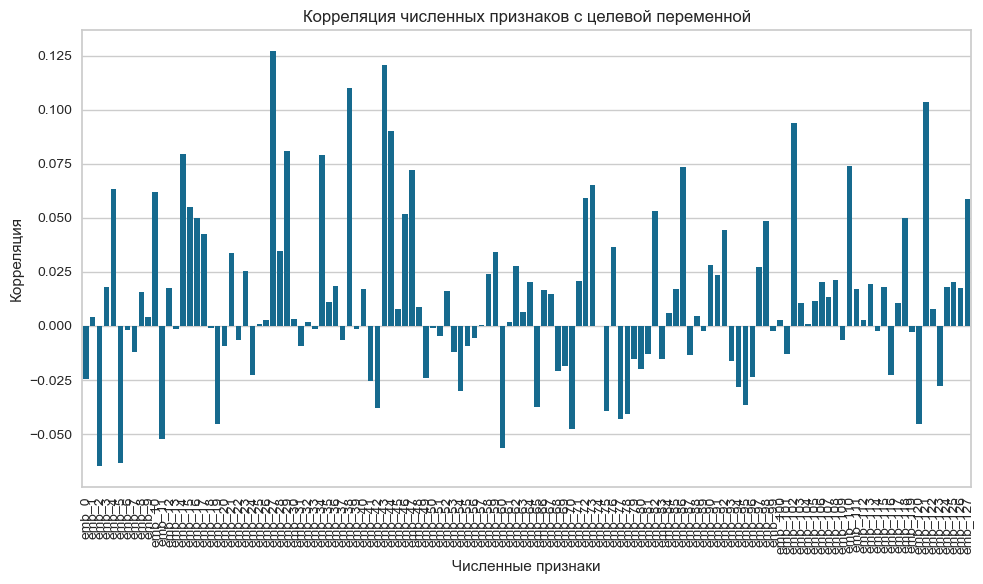

In [49]:
import seaborn as sns
correlation_matrix = X_train.drop(columns=['Stock', 'Datetime']).corr()


target_correlation = correlation_matrix['Close']


target_correlation = target_correlation.drop('Close')


plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.title('Корреляция численных признаков с целевой переменной')
plt.xlabel('Численные признаки')
plt.ylabel('Корреляция')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
correlation_with_target = correlation_matrix['Close'].abs()

top_30_correlated_features = correlation_with_target.sort_values(ascending=False).head(30)

print(top_30_correlated_features)


Close      1.000000
emb_27     0.127090
emb_43     0.120696
emb_38     0.109963
emb_121    0.103554
emb_102    0.093800
emb_44     0.090082
emb_29     0.081077
emb_14     0.079492
emb_34     0.079277
emb_110    0.073890
emb_86     0.073269
emb_47     0.072211
emb_73     0.065269
emb_2      0.064716
emb_4      0.063407
emb_5      0.063319
emb_10     0.061822
emb_72     0.059089
emb_127    0.058566
emb_60     0.056371
emb_15     0.054989
emb_82     0.052997
emb_11     0.052257
emb_46     0.051907
emb_118    0.049978
emb_16     0.049871
emb_98     0.048514
emb_70     0.047576
emb_120    0.045538
Name: Close, dtype: float64


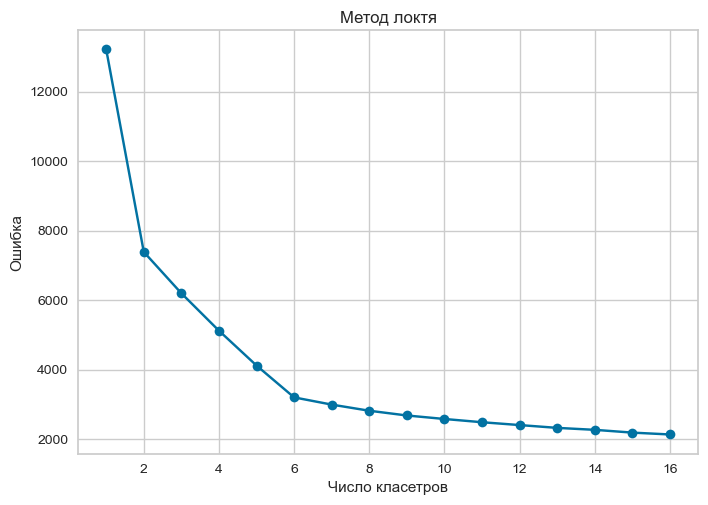

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(data, max_clusters):
    distortions = []
    
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Число класетров')
    plt.ylabel('Ошибка')
    plt.title('Метод локтя')
    plt.show()

elbow_method(X_train.drop(columns=['Datetime', 'Stock', 'Close']), 16)


## Оптимальное число кластеров - 12

<Figure size 1200x500 with 0 Axes>

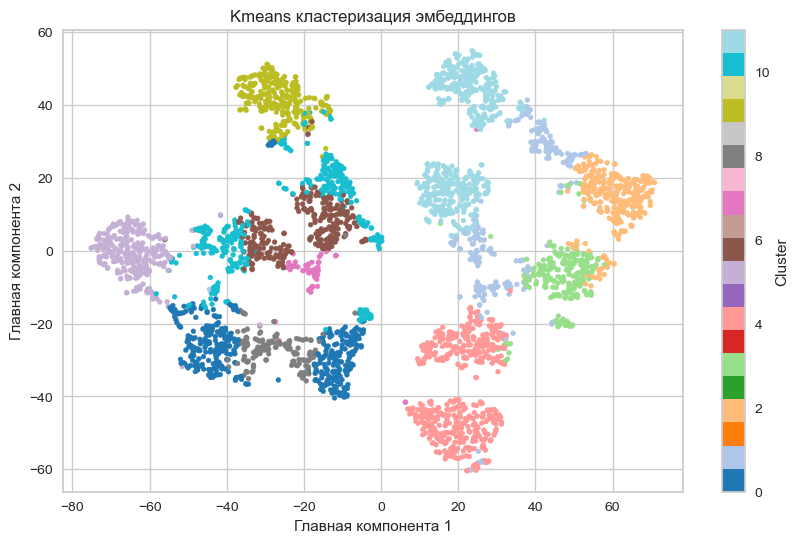

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer



scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train.drop(columns=['Close', 'Stock', 'Datetime']))

pca = TSNE(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=12)


plt.figure(figsize=[12, 5])
kmeans.fit(scaled_data)


cluster_labels = kmeans.labels_


plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='tab20', s=12)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Kmeans кластеризация эмбеддингов')
plt.colorbar(label='Cluster')
plt.show()


In [53]:
X_train['cluster'] = cluster_labels

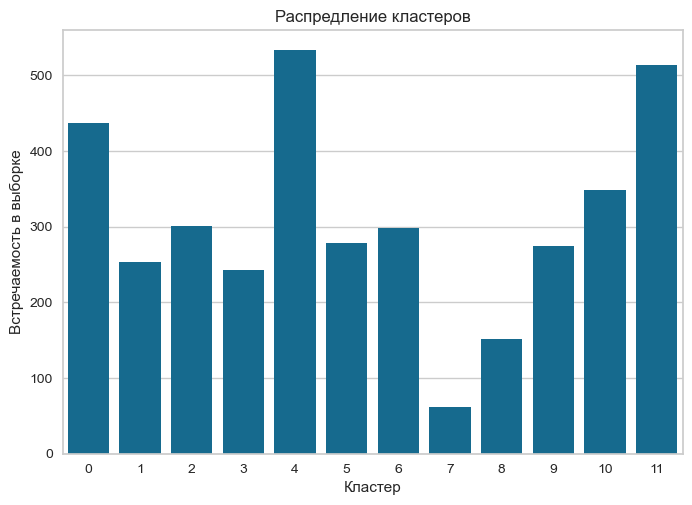

In [54]:

cluster_counts = X_train['cluster'].value_counts()

sns.countplot(x='cluster', data=X_train)
plt.title('Распредление кластеров')
plt.xlabel('Кластер')
plt.ylabel('Встречаемость в выборке')
plt.show()


In [55]:
def top_mode(data, n_top):
    mode_counts = data.value_counts()
    top_n_mode = mode_counts.head(n_top)
    return top_n_mode



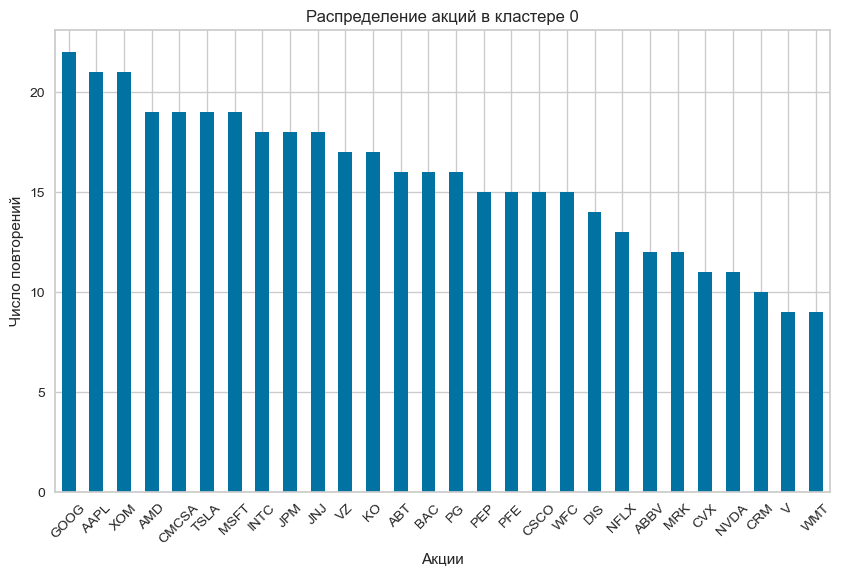

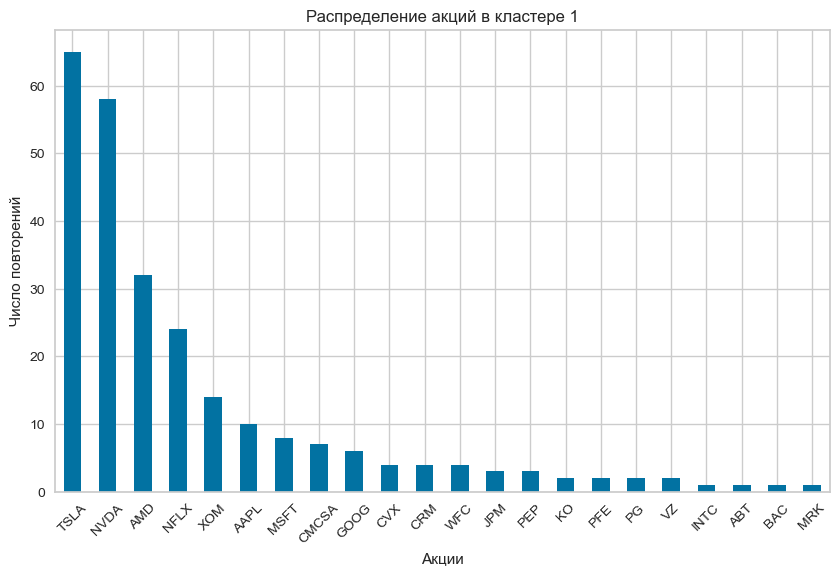

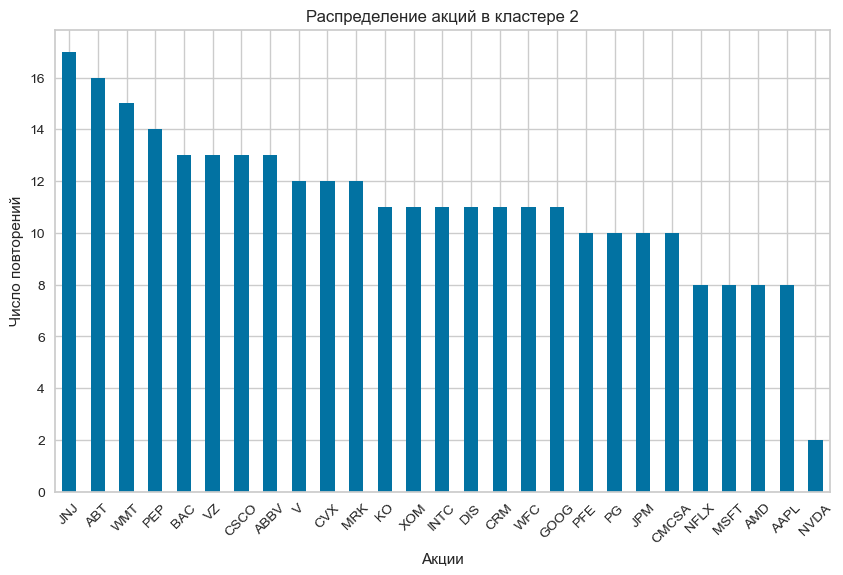

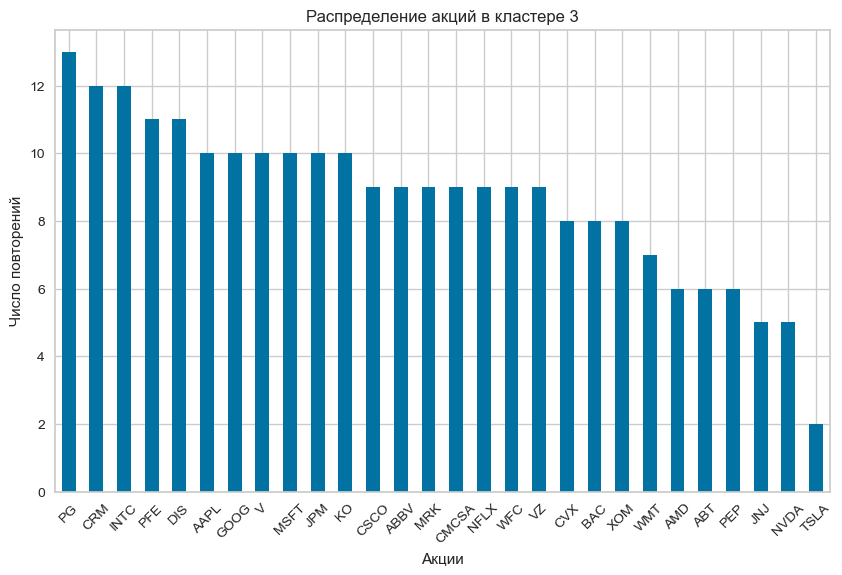

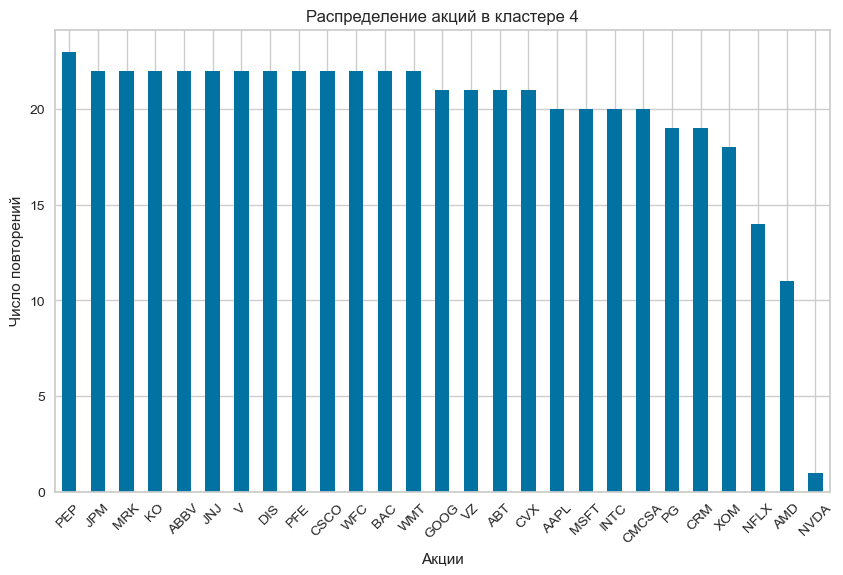

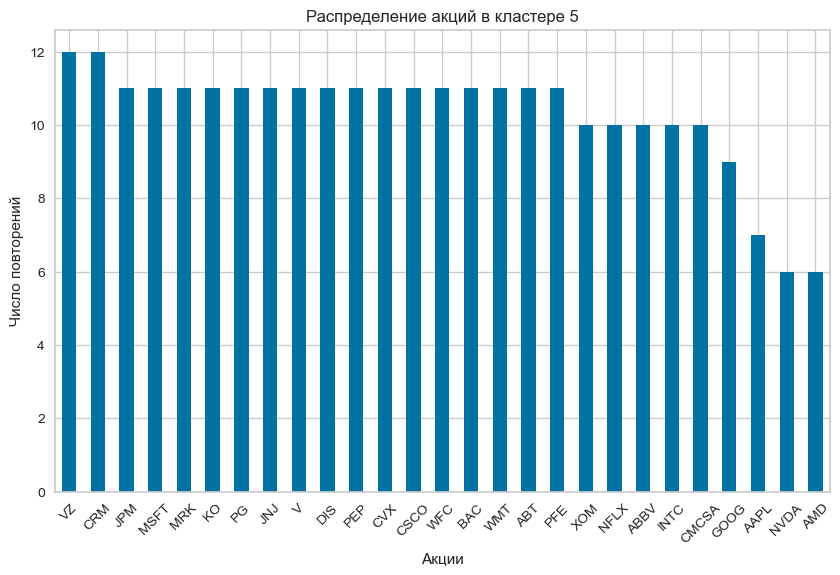

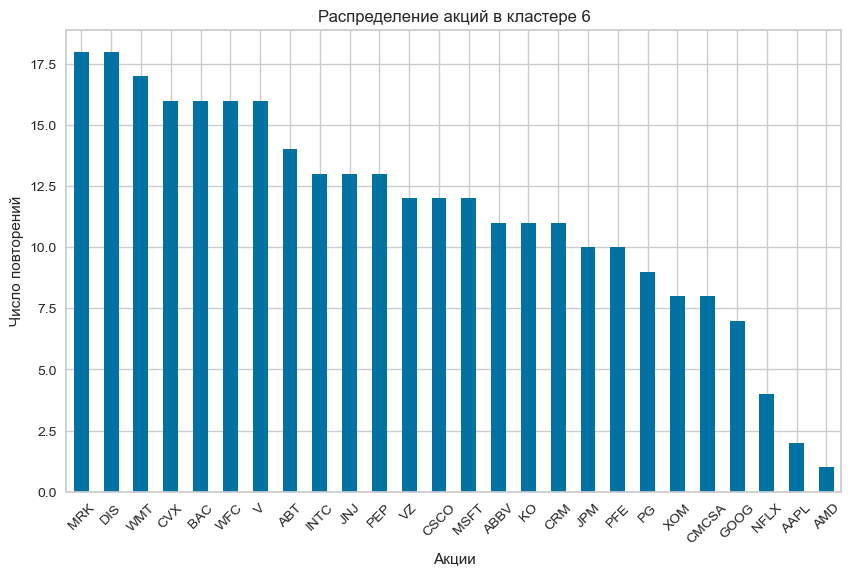

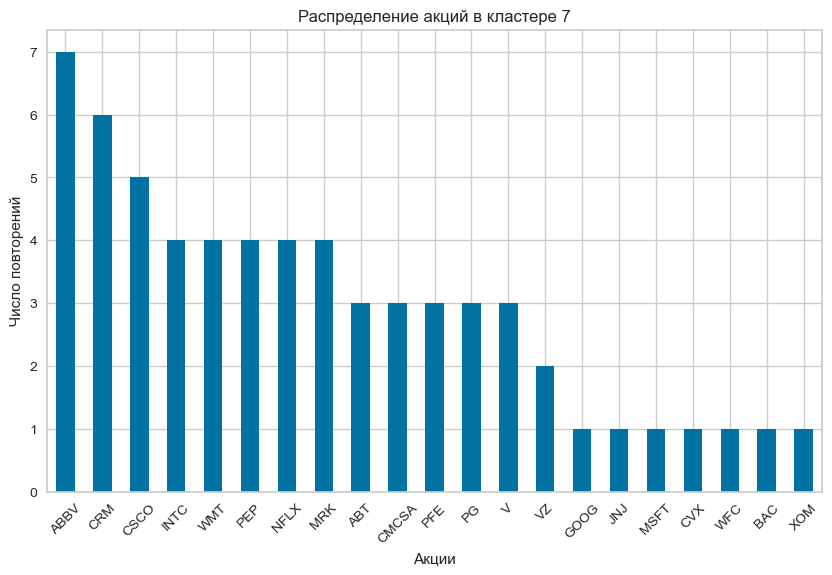

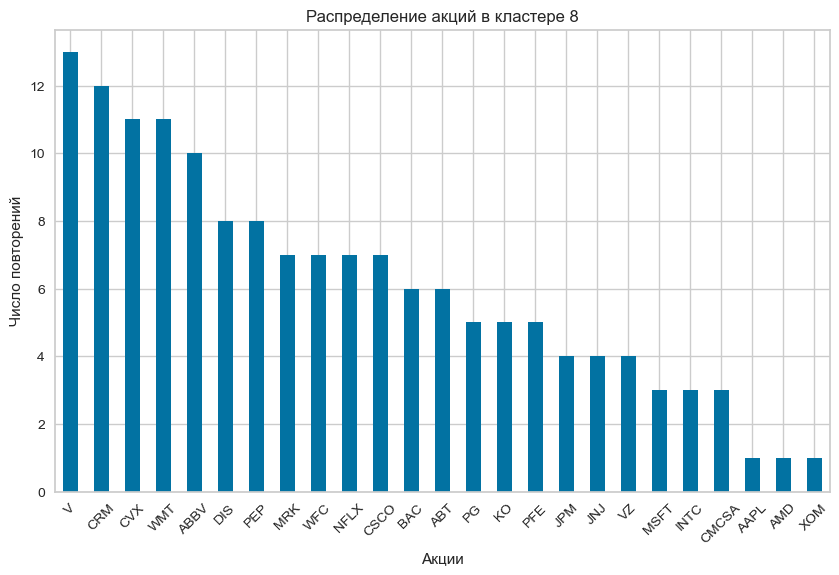

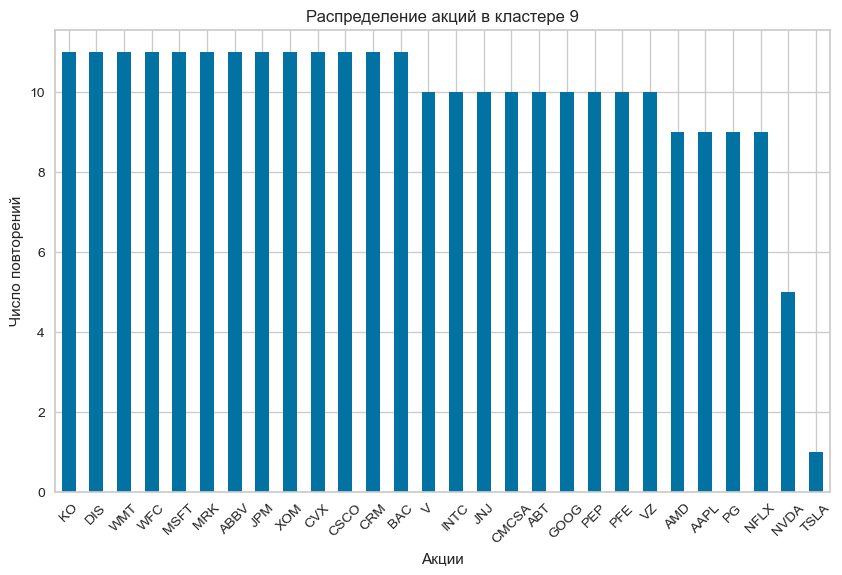

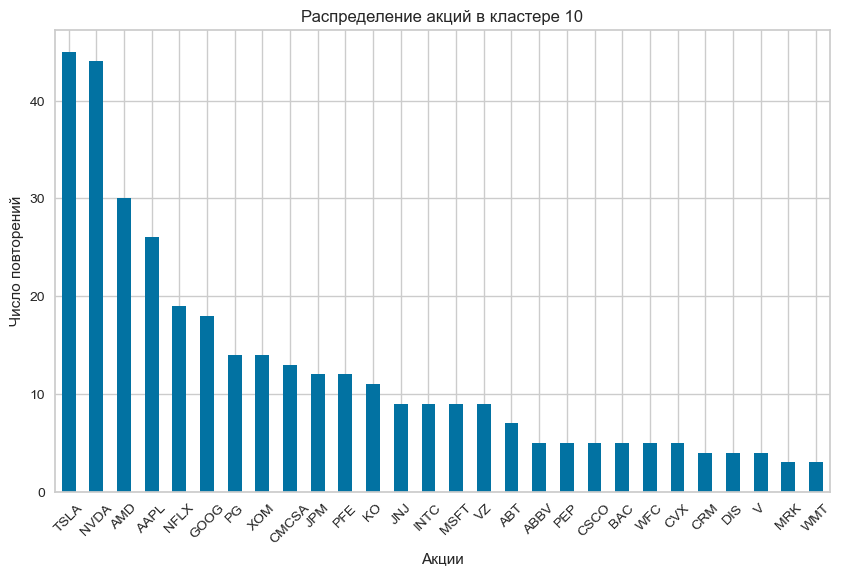

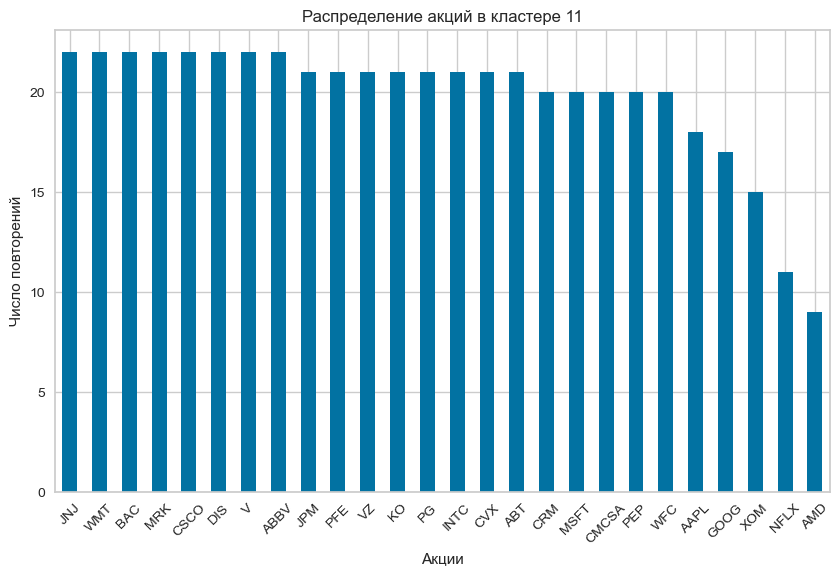

In [56]:
import matplotlib.pyplot as plt
data = {}
n_mode = 100
for i in range(12):

    cluster_data = X_train[X_train["cluster"] == i]["Stock"]
    data[f'df_cluster{i}'] = X_train[X_train["cluster"] == i].copy()
    plt.figure(figsize=(10, 6))
    cluster_data.value_counts().head(n_mode).plot(kind='bar')
    plt.title(f'Распределение акций в кластере {i}')
    plt.xlabel('Акции')
    plt.ylabel('Число повторений')
    plt.xticks(rotation=45)
    plt.show()

    

In [57]:
df_grouped = X_train.groupby(['Stock', 'cluster'], as_index=False)['Close'].count()
train_pivot_table = df_grouped.pivot_table(index=['Stock'], columns=['cluster'], values=['Close'])
train_pivot_table.columns = [' '.join(str(col[1])) for col in train_pivot_table.columns.values]
train_pivot_table.reset_index(inplace=True)

In [58]:
for col in train_pivot_table.columns:
    if col == 'Stock':
        pass
    else:
        train_pivot_table.rename(columns={col : f'count_in_{col}cluster'}, inplace=True)

In [59]:
train_pivot_table.fillna(0, inplace=True)

In [60]:
train_pivot_table

,Stock,count_in_0cluster,count_in_1cluster,count_in_2cluster,count_in_3cluster,count_in_4cluster,count_in_5cluster,count_in_6cluster,count_in_7cluster,count_in_8cluster,count_in_9cluster,count_in_1 0cluster,count_in_1 1cluster
0,AAPL,21.0,10.0,8.0,10.0,20.0,7.0,2.0,0.0,1.0,9.0,26.0,18.0
1,ABBV,12.0,0.0,13.0,9.0,22.0,10.0,11.0,7.0,10.0,11.0,5.0,22.0
2,ABT,16.0,1.0,16.0,6.0,21.0,11.0,14.0,3.0,6.0,10.0,7.0,21.0
3,AMD,19.0,32.0,8.0,6.0,11.0,6.0,1.0,0.0,1.0,9.0,30.0,9.0
4,BAC,16.0,1.0,13.0,8.0,22.0,11.0,16.0,1.0,6.0,11.0,5.0,22.0
5,CMCSA,19.0,7.0,10.0,9.0,20.0,10.0,8.0,3.0,3.0,10.0,13.0,20.0
6,CRM,10.0,4.0,11.0,12.0,19.0,12.0,11.0,6.0,12.0,11.0,4.0,20.0
7,CSCO,15.0,0.0,13.0,9.0,22.0,11.0,12.0,5.0,7.0,11.0,5.0,22.0
8,CVX,11.0,4.0,12.0,8.0,21.0,11.0,16.0,1.0,11.0,11.0,5.0,21.0
9,DIS,14.0,0.0,11.0,11.0,22.0,11.0,18.0,0.0,8.0,11.0,4.0,22.0


In [68]:
def add_date_features(row):
    date_row = datetime.datetime.strptime(row['Datetime'], '%Y-%m-%d %H:%M:%S')
    day_name = calendar.day_name[date_row.weekday()]
    row['day_of_week'] = day_name
    
    weekday_number = date_row.weekday()
    if weekday_number % 2 != 0:
        row['even_day'] = 1
    else:
        row['even_day'] = 0
    day_number = date_row.day
    if day_number >=0 and day_number < 8:
        row['number_week'] = 1
    elif day_number >= 8 and day_number < 15:
         row['number_week'] = 2
    elif day_number >= 15 and day_number <= 21:
        row['number_week'] = 3
    elif day_number >= 22 and day_number <= 28:
        row['number_week'] = 4
    elif day_number >= 29 and day_number <= 31:
        row['number_week'] = 5
    
    return row


In [69]:
X_train = X_train.apply(add_date_features, axis=1)

In [70]:
X_train

,Datetime,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_124,emb_125,emb_126,emb_127,Stock,Close,cluster,day_of_week,even_day,number_week
0,2023-10-02 17:00:00,-0.576592,-0.085389,-0.180236,0.104353,0.052601,-0.373977,-0.303355,-0.245368,-0.153448,...,-0.277801,-0.228087,0.075494,0.053723,AAPL,173.344000,3,Monday,0,1
1,2023-10-02 18:00:00,0.005394,-0.263543,-0.445396,0.011726,-0.040396,-0.344073,0.058727,-0.339872,-0.423581,...,0.106189,-0.060161,-0.139006,-0.091891,AAPL,173.639167,0,Monday,0,1
2,2023-10-02 19:00:00,-0.624870,-0.094695,-0.210419,-0.111449,0.044308,-0.293072,-0.365148,-0.068545,0.067939,...,-0.546129,-0.219797,0.113228,0.051339,AAPL,173.219500,1,Monday,0,1
3,2023-10-02 20:00:00,-0.269701,-0.319665,-0.387342,-0.009177,-0.045935,-0.417750,-0.300339,-0.147413,-0.284537,...,-0.076986,-0.120545,-0.191235,-0.055262,AAPL,173.224333,5,Monday,0,1
4,2023-10-02 21:00:00,-0.389854,-0.064718,-0.247088,-0.022711,0.074581,-0.309505,-0.114075,-0.362405,-0.253921,...,-0.216250,-0.152970,0.059913,0.014242,AAPL,173.018417,4,Monday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,2023-10-31 18:00:00,0.127839,-0.270929,-0.286715,-0.130877,-0.128611,-0.268630,-0.031651,-0.439968,-0.582796,...,0.264758,0.015319,-0.287524,-0.189170,XOM,105.780667,0,Tuesday,1,5
3692,2023-10-31 19:00:00,-0.310485,-0.198897,-0.217486,-0.300649,-0.001383,-0.059892,-0.183588,-0.068694,-0.087093,...,-0.435467,-0.010642,-0.049000,-0.034093,XOM,105.537583,11,Tuesday,1,5
3693,2023-10-31 20:00:00,-0.346416,-0.483199,-0.169879,-0.217108,-0.190735,-0.300871,-0.536324,-0.160496,-0.271850,...,-0.264142,-0.115150,-0.252728,-0.215898,XOM,105.716186,9,Tuesday,1,5
3694,2023-10-31 21:00:00,-0.124665,-0.109366,-0.208658,-0.113701,0.002692,-0.207501,-0.002271,-0.349507,-0.401982,...,-0.110616,-0.029102,-0.123710,-0.101266,XOM,105.618500,4,Tuesday,1,5


In [92]:

new_data = {}
n_mode = 100
for i in range(12):
    cluster_data = X_train[X_train["cluster"] == i]
    new_data[f'cluster_{i}'] = cluster_data.copy()
    print(f'Кластер {i}')
    print(f"Cамые частые дни недели в кластере: {top_mode(cluster_data['day_of_week'], 7)}")
    print(f"Число четных дней в кластере: {cluster_data['even_day'].sum()}")
    print(f"Число не четных дней в кластере: {cluster_data['even_day'].count() - cluster_data['even_day'].sum()}")
    print(f"Cамый частые номера недели: {top_mode(cluster_data['number_week'], 5)}")


    #Закоментаренный код ниже выдает датафреймы с информацией в разрезе всех акций кластера

    #print(cluster_data.groupby('Stock').agg({'day_of_week' : compute_mode, 'even_day' : 'count', 'number_week' : 'count'}))

    

Кластер 0
Cамые частые дни недели в кластере: day_of_week
Tuesday      104
Monday        90
Thursday      83
Wednesday     81
Friday        79
Name: count, dtype: int64
Число четных дней в кластере: 187
Число не четных дней в кластере: 250
Cамый частые номера недели: number_week
2    100
4    100
3     99
1     97
5     41
Name: count, dtype: int64
Кластер 1
Cамые частые дни недели в кластере: day_of_week
Tuesday      75
Monday       55
Friday       50
Thursday     38
Wednesday    36
Name: count, dtype: int64
Число четных дней в кластере: 113
Число не четных дней в кластере: 141
Cамый частые номера недели: number_week
1    70
2    62
3    48
4    38
5    36
Name: count, dtype: int64
Кластер 2
Cамые частые дни недели в кластере: day_of_week
Tuesday      72
Thursday     61
Monday       60
Wednesday    55
Friday       53
Name: count, dtype: int64
Число четных дней в кластере: 133
Число не четных дней в кластере: 168
Cамый частые номера недели: number_week
4    125
3     97
5     48
2     